# Project Code
Group Member: Layton Liu, Tommy Kong, Gary Lin

Objective: In this project, we will analyze the aviation accident over 1919-2023 and the causing factors behind.

Source: https://www.kaggle.com/datasets/warcoder/civil-aviation-accidents

## 1. Data Aggregation

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas
from pandas_datareader import wb

Since the data contains some incomprehensible value, we need to eliminate them first.

In [2]:
naValues = ['date unk.', 'unknown', 'Unknown country', '?']
data = pd.read_csv('aviation-accident.csv', na_values=naValues)
print(f'Original shape: {data.shape}')
data.dropna(subset=['date', 'fatalities', 'country'], axis=0, inplace=True)
data.shape

Original shape: (23917, 9)


(19825, 9)

The values in "fatalities" and "categories" are hard to read, thus we developed three functions to help us handle these values. We also developed an extra function to get the "season" when the accident happened based on the "date". These four functions are shown as follows:

In [3]:
def toInt(strValue):
    try:
        intValue = int(strValue)
        return intValue
    except Exception:
        return sum(map(int, re.findall('\d+', strValue)))

In [4]:
def catDetails(strValue):
    accidentCat = {'A': 'Accident', 'I': 'Incident', 'H': 'Hijacking', 'C': 'Criminal Occurrence', 'O': 'Other Occurrence', 'U': 'Unknown'}
    convertedValue = ''

    convertedValue += accidentCat.get(strValue[0])

    return convertedValue

In [5]:
def damDetails(strValue):
    accidentDam = {'1': 'hull-loss', '2': 'repairable damage'}
    convertedValue = ''

    convertedValue += accidentDam.get(strValue[1])

    return convertedValue

In [6]:
def getSeason(date):
    month = date.month

    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    elif month in [12, 1, 2]:
        return 'Winter'

Before analyzing the data, we organized it to increase readablity.

In [7]:
data['year'] = data['year'].astype(int)
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')
data['fatalities'] = data['fatalities'].map(toInt)
data = data.rename(columns={'cat':'category'})
data['damage'] = data['category'].map(damDetails)
data['category'] = data['category'].map(catDetails)
data['season'] = data['date'].map(getSeason)

In [8]:
data = data.set_index(['year'])
data.head()

,date,type,registration,operator,fatalities,location,country,category,damage,season
year,,,,,,,,,,
1919,1919-08-02,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,Accident,hull-loss,Summer
1919,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,Accident,hull-loss,Summer
1920,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,Accident,hull-loss,Winter
1920,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,Accident,hull-loss,Winter
1920,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,Accident,hull-loss,Summer


In [9]:
data.to_csv('cleaned.csv')
data.dtypes

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities               int64
location                object
country                 object
category                object
damage                  object
season                  object
dtype: object

## 2. Quantitative Analysis

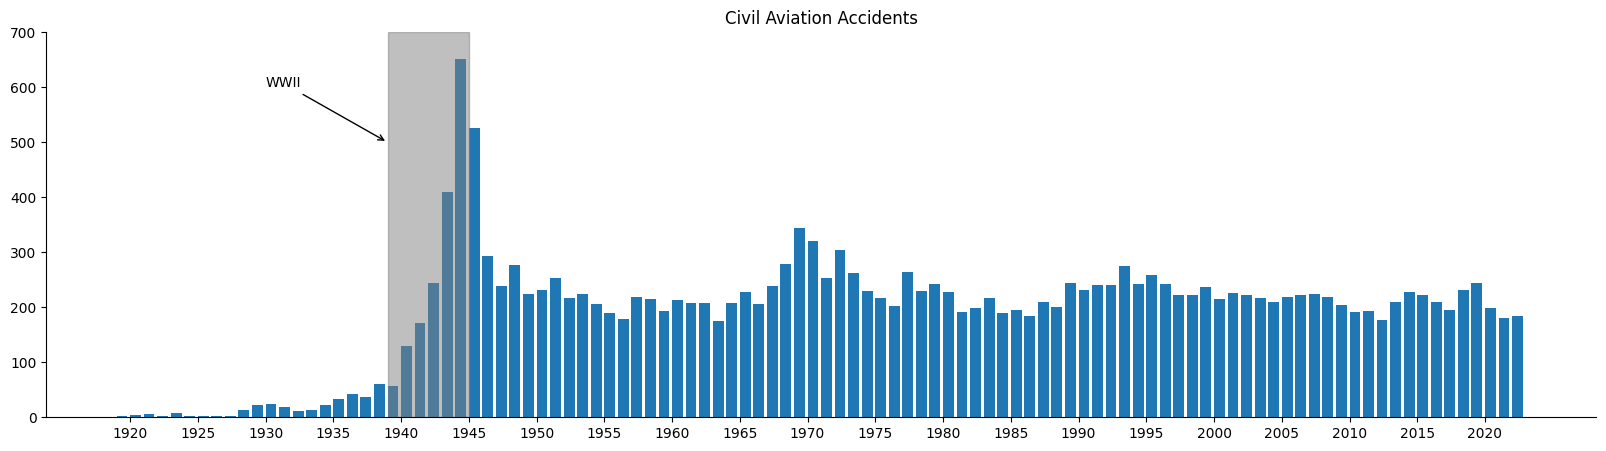

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(data.index, bins=data.iloc[-1].name-data.iloc[0].name, width=0.8)

ax.set_xticks(np.arange(1920, 2023, 5))
ax.set_ylim(0, 700)
plt.axvspan(1939, 1945, color='grey', alpha=0.5)

ax.set_title('Civil Aviation Accidents')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.annotate('WWII', xy=(1939, 500), xytext=(1930, 600), arrowprops={'facecolor':'black',  'arrowstyle':'->'})

plt.show()

C:\Users\trist\AppData\Local\Temp\ipykernel_4456\2613032745.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(data.groupby(data.index).sum().index, data.groupby(data.index).sum()['fatalities'])
C:\Users\trist\AppData\Local\Temp\ipykernel_4456\2613032745.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(data.groupby(data.index).sum().index, data.groupby(data.index).sum()['fatalities'])


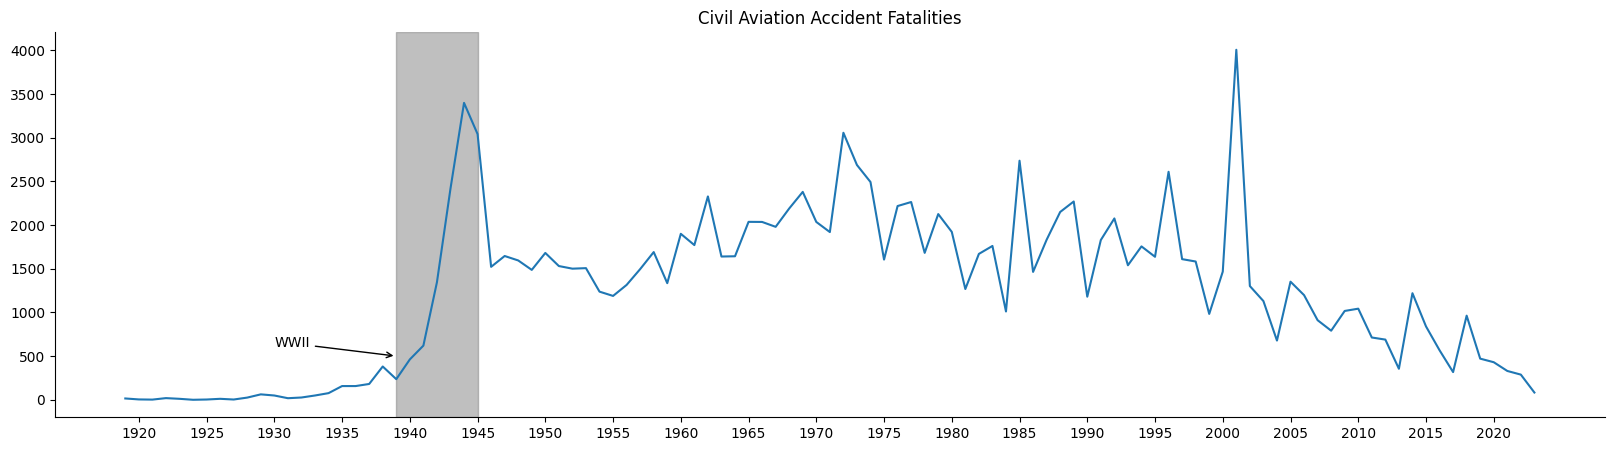

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(data.groupby(data.index).sum().index, data.groupby(data.index).sum()['fatalities'])

ax.set_xticks(np.arange(1920, 2023, 5))
plt.axvspan(1939, 1945, color='grey', alpha=0.5)

ax.set_title('Civil Aviation Accident Fatalities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.annotate('WWII', xy=(1939, 500), xytext=(1930, 600), arrowprops={'facecolor':'black',  'arrowstyle':'->'})

plt.show()

In [12]:
fatal = data.groupby('country').sum().sort_values(by='fatalities', ascending=False)

C:\Users\trist\AppData\Local\Temp\ipykernel_4456\3614552670.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fatal = data.groupby('country').sum().sort_values(by='fatalities', ascending=False)


In [13]:
# TODO

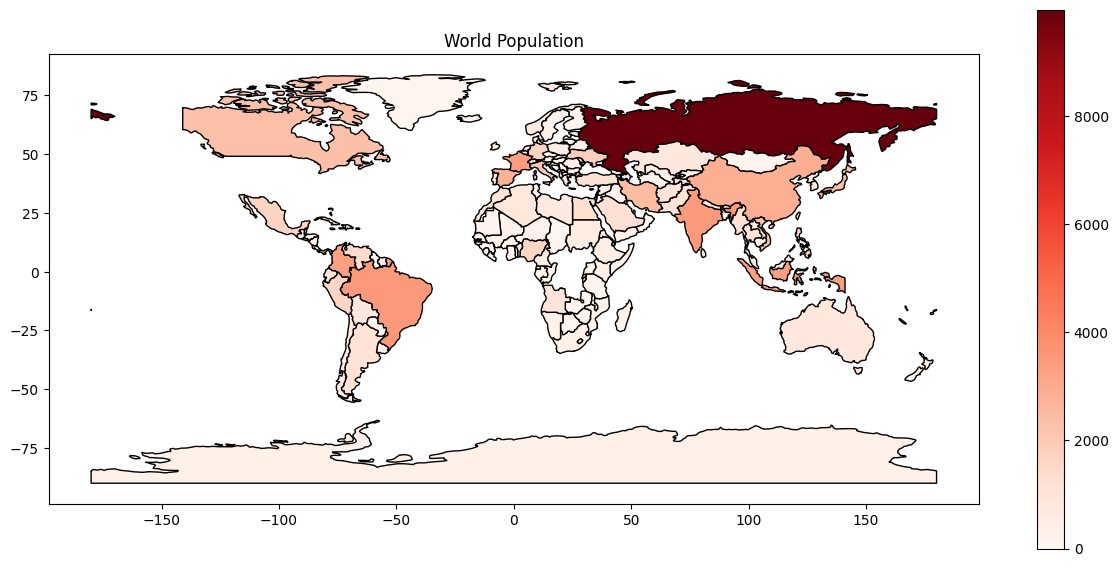

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.merge(fatal, how='left', left_on='name', right_on='country')
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('World Population')
world.plot(column='fatalities', cmap='Reds', ax=ax, legend=True, edgecolor='black')
plt.show()

## 3. Probability Analysis

In [15]:
# Aggregate fatalities and accidents data
world_agg_data = data.groupby(data.index)['fatalities'].agg(['count', 'sum']).rename(columns={'count':'accidents', 'sum':'fatalities'})

# Get total departures and passengers data from world bank
departures = wb.download(indicator='IS.AIR.DPRT', country=['ALL'], start=1970, end=2020)
departures.index.set_levels(departures.index.levels[1].astype(int), level=1, inplace=True)
passengers = wb.download(indicator='IS.AIR.PSGR', country=['ALL'], start=1970, end=2020)
passengers.index.set_levels(passengers.index.levels[1].astype(int), level=1, inplace=True)

# Merge these two datasets
merged = pd.merge(left=departures.xs('World'), right=world_agg_data, left_index=True, right_index=True, how='inner')
merged = pd.merge(left=passengers.xs('World'), right=merged, left_index=True, right_index=True, how='inner')
merged.rename(columns={'IS.AIR.PSGR':'passengers', 'IS.AIR.DPRT':'departures'}, inplace=True)
merged.head(3)

C:\Users\trist\AppData\Local\Temp\ipykernel_4456\2469290723.py:6: FutureWarning: inplace is deprecated and will be removed in a future version.
  departures.index.set_levels(departures.index.levels[1].astype(int), level=1, inplace=True)
C:\Users\trist\AppData\Local\Temp\ipykernel_4456\2469290723.py:8: FutureWarning: inplace is deprecated and will be removed in a future version.
  passengers.index.set_levels(passengers.index.levels[1].astype(int), level=1, inplace=True)


,passengers,departures,accidents,fatalities
year,,,,
2020,1.809389e+09,2.045848e+07,198,430
2019,4.557606e+09,3.920377e+07,245,471
2018,4.242448e+09,3.682823e+07,232,963


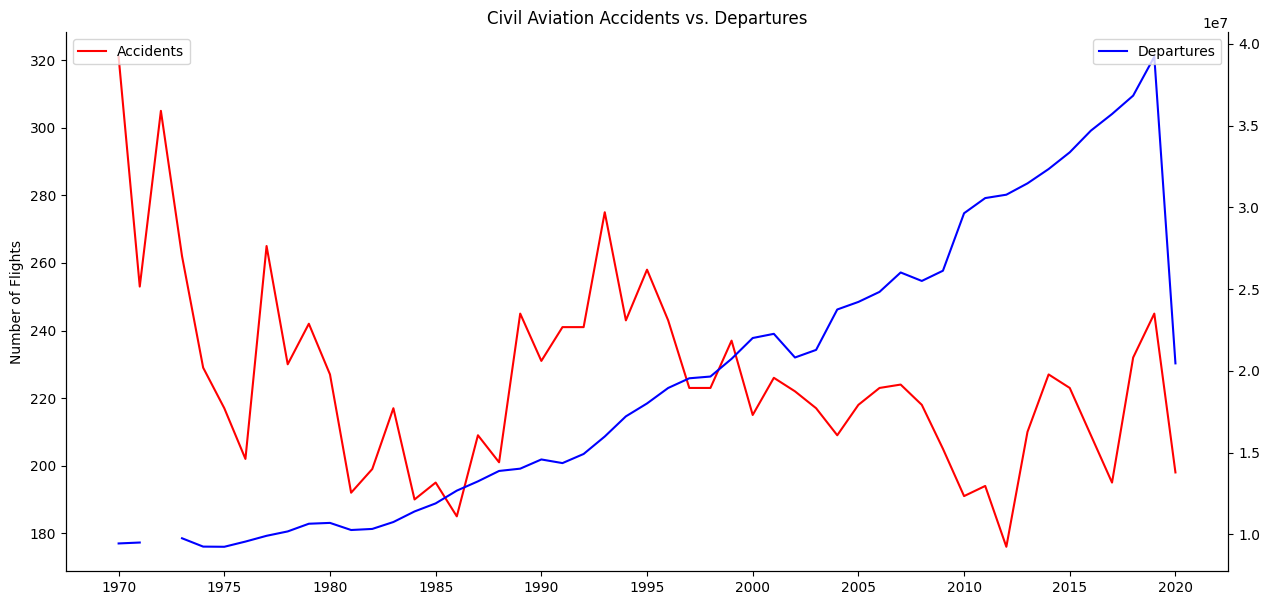

In [16]:
# Are we less likely to encounter an accident?
fig, ax = plt.subplots(figsize=(15,7))
ax2 = ax.twinx()
ax.plot(merged.index, merged['accidents'], color='red', label='Accidents')
ax2.plot(merged.index, merged['departures'], color='blue', label='Departures')
ax.set_xticks(np.arange(1970, 2021, 5))
ax.set_title('Civil Aviation Accidents vs. Departures')
ax.set_ylabel('Number of Flights')
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

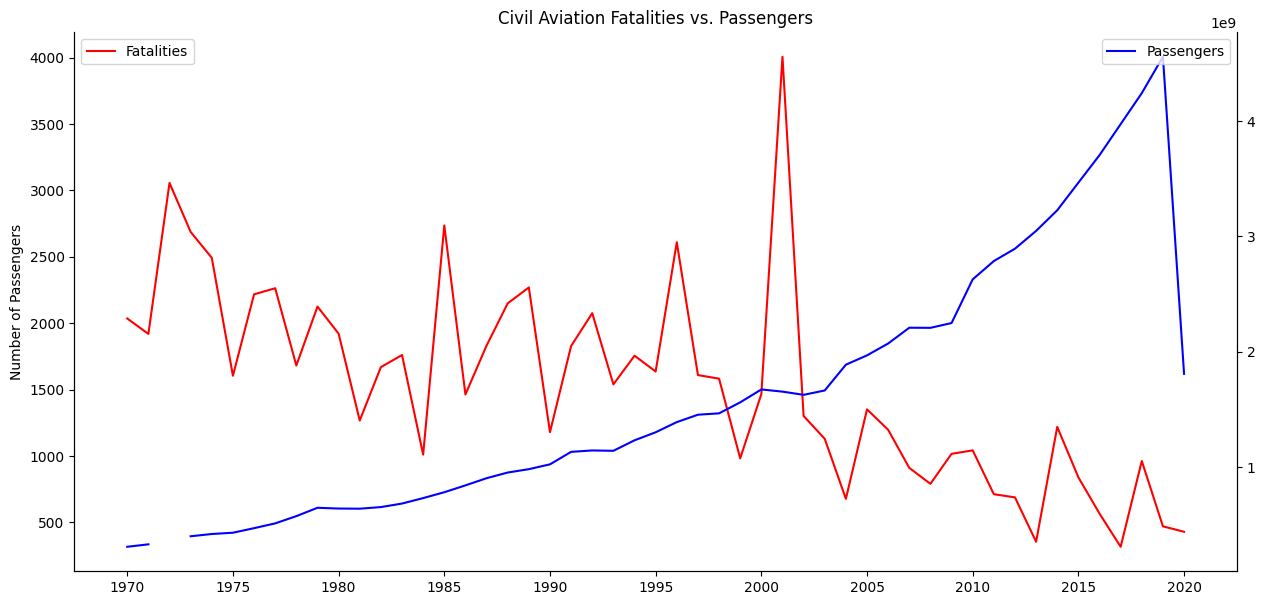

In [17]:
# Are we less likely to die to a flight accident
fig, ax = plt.subplots(figsize=(15,7))
ax2 = ax.twinx()
ax.plot(merged.index, merged['fatalities'], color='red', label='Fatalities')
ax2.plot(merged.index, merged['passengers'], color='blue', label='Passengers')
ax.set_xticks(np.arange(1970, 2021, 5))
ax.set_title('Civil Aviation Fatalities vs. Passengers')
ax.set_ylabel('Number of Passengers')
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

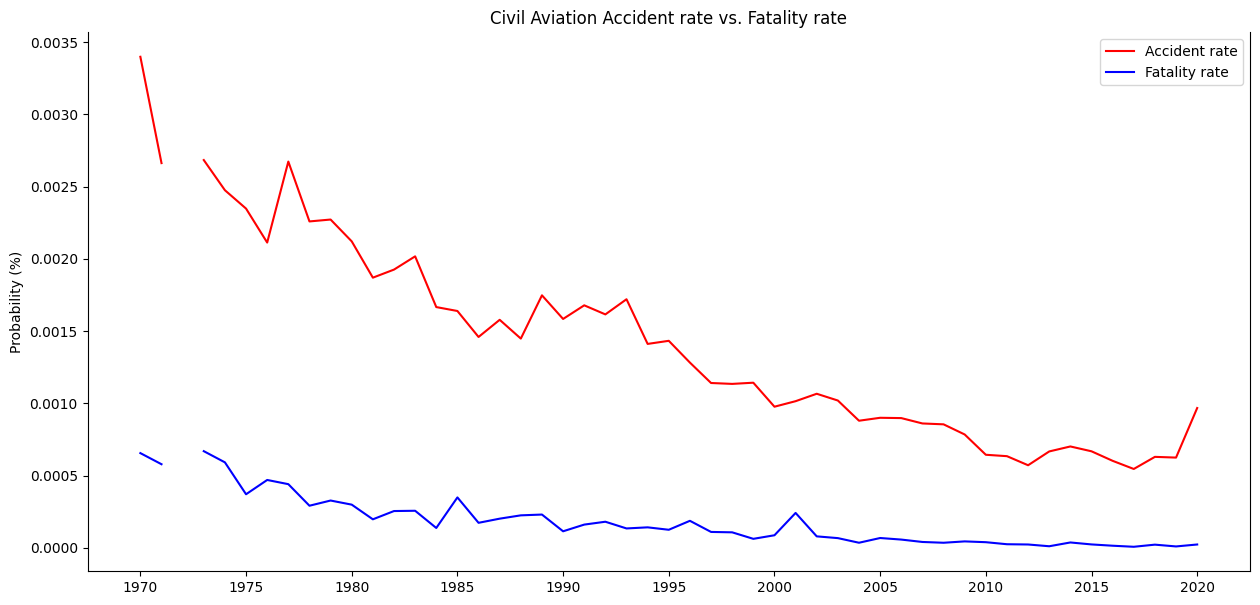

In [18]:
# How have these two probabilities envolved
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(merged.index, merged['accidents']/merged['departures']*100, color='red', label='Accident rate')
ax.plot(merged.index, merged['fatalities']/merged['passengers']*100, color='blue', label='Fatality rate')
ax.set_xticks(np.arange(1970, 2021, 5))
ax.set_title('Civil Aviation Accident rate vs. Fatality rate')
ax.set_ylabel('Probability (%)')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right')
plt.show()

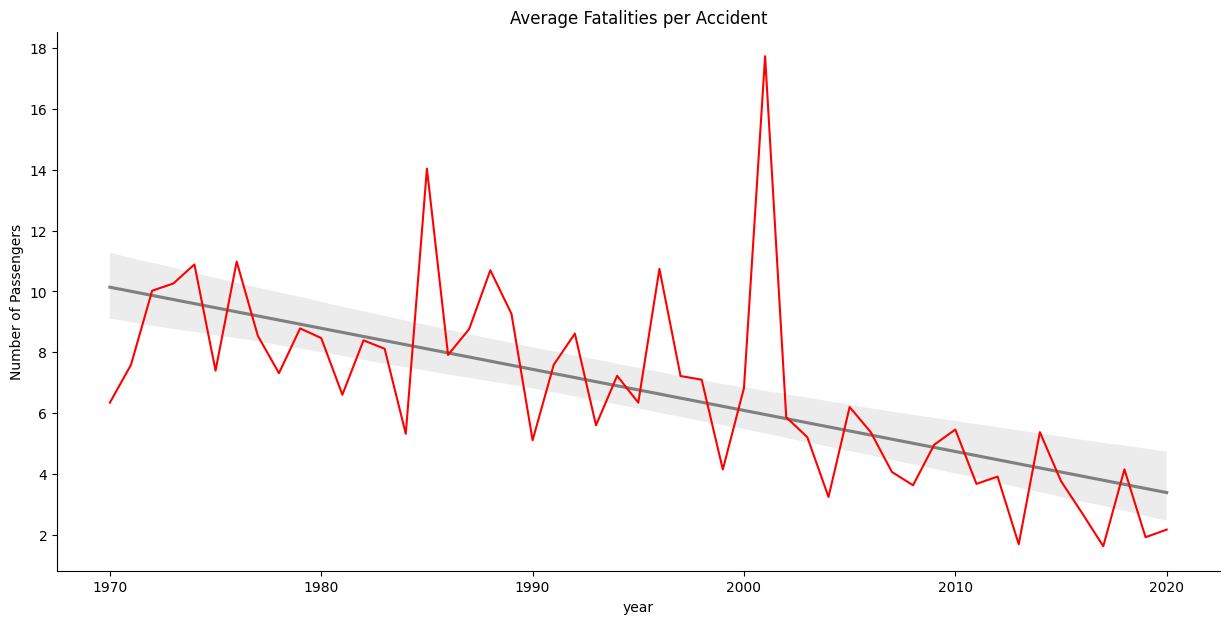

In [19]:
# Unfortunately we encounter an accident, are we less likely to die to it
fig, ax = plt.subplots(figsize=(15,7))
sns.regplot(x=merged.index, y=merged['fatalities']/merged['accidents'], data=merged, scatter=False, color='gray')
ax.plot(merged.index, merged['fatalities']/merged['accidents'], color='red', label='Accidents')
ax.set_title('Average Fatalities per Accident')
ax.set_ylabel('Number of Passengers')
sns.despine()
plt.show()